In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from GomokuTools import GomokuTools, N_9x9
from GomokuBoard import GomokuBoard
from HeuristicScore import HeuristicScore

---
# The Gomoku Board

In [3]:
A,B,C,D,E,F,G,H,I,K,L,M,N,O,P,Q,R,S,T,U = \
    1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20

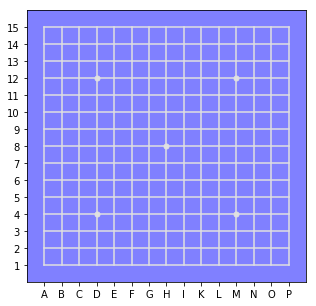

In [4]:
board=GomokuBoard(15, 5)
board.display()

---
### Visualizing threats and opportunities

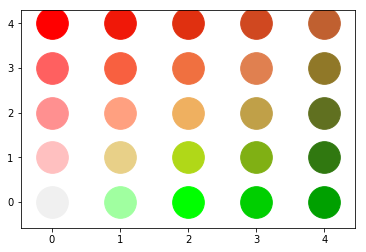

In [5]:
for d in range(4, -1, -1):
    for o in range(5):
        plt.scatter([o], [d], color=board.color_scheme[o][d], s=1000)

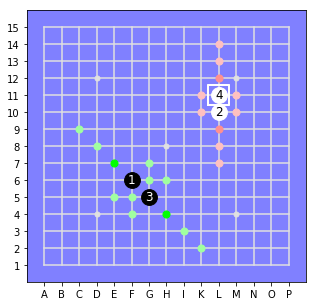

In [6]:
board = GomokuBoard(15, 5, [(F,6), (L,10), (G,5), (L,11)], 
                    HeuristicScore(kappa0=1.5, kappa1 = 5))
board.display(score='current');

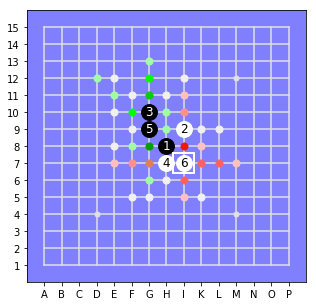

In [7]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.display(score='current');

The board chooses the color automatically.

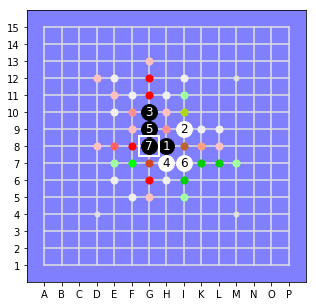

In [8]:
board.set(G,8)
board.display(score='current')

Undo the last move:

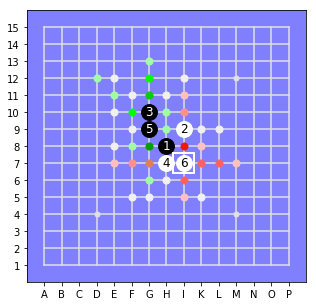

In [9]:
board.undo()
board.display()

---
Winding the game forward and backward.

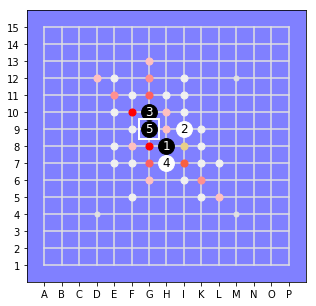

In [10]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9)])
board.display()

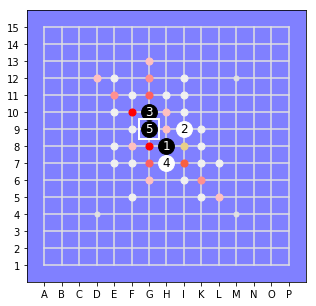

In [11]:
board = GomokuBoard(15, 5, [(H,8), (I,9), (G,10), (H,7), (G, 9), (I,7)])
board.bwd()
board.display()

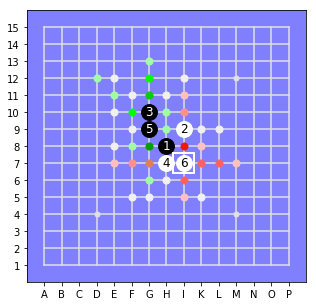

In [12]:
board.fwd()
board.display()

In [13]:
game = pd.read_csv('3_11_3_2.psq', header=None)
# originally 20x20 data, but fits on a 15x15, if we shift it a bit to the left
game = game - [5,0] 

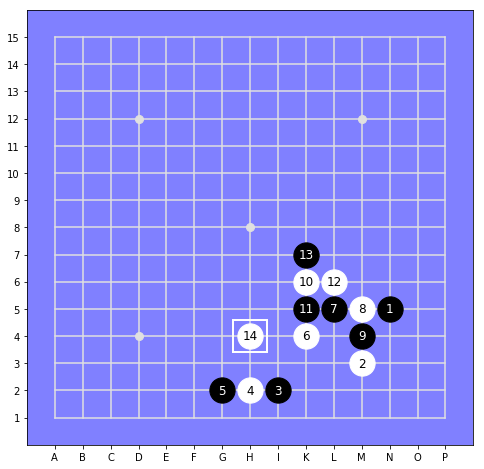

In [14]:
stones = game.values.tolist()
board = GomokuBoard(15, 8, stones)
board.bwd(20).display(score=None)

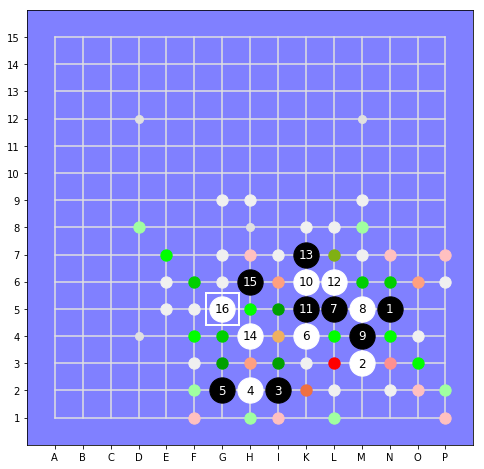

In [15]:
board.fwd(2).display(score='w');

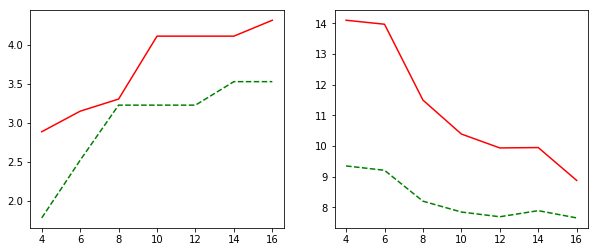

In [16]:
n = (board.cursor+1)
data = pd.DataFrame(board.stats['w'])
figure, axes = plt.subplots(1,2, figsize=(10, 4))
axes[0].plot(range(4, n+2, 2), data['max_o'][2:n//2+1], 'g--', 
         range(4, n+2, 2), data['max_d'][2:n//2+1], 'r' );
axes[1].plot(range(4, n+2, 2), data['avg_o'][2:n//2+1], 'g--', 
         range(4, n+2, 2), data['avg_d'][2:n//2+1], 'r' );

In [17]:
pd.DataFrame(board.stats['w'])

,avg_d,avg_o,gsum_d,gsum_o,max_d,max_o
0,32.501864,0.000000,0,0,1.442250,0.000000
1,18.660002,9.811679,0,0,1.915068,1.442250
2,14.102542,9.346704,0,0,2.884499,1.781797
3,13.972104,9.204743,0,0,3.147656,2.519842
4,11.495594,8.195959,0,0,3.302686,3.224968
5,10.388008,7.842206,0,0,4.107799,3.224968
6,9.934269,7.687539,0,0,4.107799,3.224968
7,9.946603,7.886963,0,0,4.107799,3.525576
8,8.874284,7.649925,0,0,4.311311,3.525576
9,9.172116,7.824934,0,0,4.311311,3.794788
